# ACPPred Exploratory Data Analysis
This is a notebook aimed in the implementation of a classification model for anticancer predicition using `AntiCP2` database.

In [1]:
!wget -O ../data/raw/train_negative.txt https://raw.githubusercontent.com/omixlab/anticancer-peptide/main/data/raw/anti_cp/anticp2_alternate_internal_negative.txt
!wget -O ../data/raw/train_positive.txt https://raw.githubusercontent.com/omixlab/anticancer-peptide/main/data/raw/anti_cp/anticp2_alternate_internal_positive.txt
!wget -O ../data/raw/test_negative.txt https://raw.githubusercontent.com/omixlab/anticancer-peptide/main/data/raw/anti_cp/anticp2_alternate_validation_negative.txt
!wget -O ../data/raw/test_positive.txt https://raw.githubusercontent.com/omixlab/anticancer-peptide/main/data/raw/anti_cp/anticp2_alternate_validation_positive.txt

--2024-04-09 14:51:07--  https://raw.githubusercontent.com/omixlab/anticancer-peptide/main/data/raw/anti_cp/anticp2_alternate_internal_negative.txt
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 22467 (22K) [text/plain]
Salvando em: ‘../data/raw/train_negative.txt’

../data/raw/train_n 100%[===================>]  21,94K  --.-KB/s    em 0,003s  

2024-04-09 14:51:07 (6,28 MB/s) - ‘../data/raw/train_negative.txt’ salvo [22467/22467]

--2024-04-09 14:51:08--  https://raw.githubusercontent.com/omixlab/anticancer-peptide/main/data/raw/anti_cp/anticp2_alternate_internal_positive.txt
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando-se a raw.githubusercontent.com 

# Loading AntiCP data to Pandas DataFrame

In [3]:
import pandas as pd

rows = []

for line in open ('../data/raw/train_positive.txt'): # para cada linha no arquivo aberto sera:
    row = (line.strip('\n'), 'train', 1) # inserido uma linha, feito a quebra de linha com \n e 1 sera atribuido aqueles peptideos que sao cancerigenos
    rows.append(row) # adiciona a linha anterior aos rows de uma tabela

for line in open ('../data/raw/train_negative.txt'):
    row = (line.strip('\n'), 'train', 0) 
    rows.append(row)

for line in open ('../data/raw/test_positive.txt'):
    row = (line.strip('\n'), 'test', 1) 
    rows.append(row)

for line in open ('../data/raw/test_negative.txt'):
    row = (line.strip('\n'), 'test', 0) 
    rows.append(row)

df_raw = pd.DataFrame(rows, columns=['peptide', 'subset', 'activity']) # df_raw configura as caracterisitcas da tabela; colchete se usa para dar nomes em uma lista
df_raw # chama o que foi configurada na linha anterior

,peptide,subset,activity
0,FLLFPLMCKIQGKC,train,1
1,WALAL,train,1
2,FLSLIPSLVGGSISAFK,train,1
3,VNWKKIILGKIIKVVK,train,1
4,FFGWLIKGAIHAGKAIHGLIHRRRH,train,1
...,...,...,...
1935,PLGTMRRQVT,test,0
1936,WSQYYDHAVPGTLKQGEATKRTGTTIRFWADPDIFETTEYDFET,test,0
1937,LVNIDEIGERIAWSVVEFFNIEAN,test,0
1938,DALAGRLLASAAQENEPFWRLPLAEFHRNQLP,test,0


In [8]:
# agora se deve adaptar os resultados anteriores para que um modelo de aprendizagem de maquinas possa processar as informações
# letras maisculas são para representaçoes .. e letras minusculas são para representaçoes ..

from Bio.SeqUtils import ProtParam # transforma em aminoacidos 

def compute_aa_composition(peptide):
    protein_analysis = ProtParam.ProteinAnalysis(peptide) # protanalysis tem relatorio da proteina
    return protein_analysis.get_amino_acids_percent() # mostra porcentagem de peptideos em sequencia

compute_aa_composition(peptide='WAKAWAKA')

{'A': 0.5,
 'C': 0.0,
 'D': 0.0,
 'E': 0.0,
 'F': 0.0,
 'G': 0.0,
 'H': 0.0,
 'I': 0.0,
 'K': 0.25,
 'L': 0.0,
 'M': 0.0,
 'N': 0.0,
 'P': 0.0,
 'Q': 0.0,
 'R': 0.0,
 'S': 0.0,
 'T': 0.0,
 'V': 0.0,
 'W': 0.25,
 'Y': 0.0}

In [9]:
rows = []

for r, row in df_raw.iterrows(): # 
    subset = row.subset
    activity = row.activity
    row_processed = compute_aa_composition(row.peptide)
    row_processed['subset'] = subset
    row_processed['activity'] = activity
    rows.append(row_processed)

df_processed = pd.DataFrame(rows)
df_processed 

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,subset,activity
0,0.000000,0.142857,0.000000,0.000000,0.142857,0.071429,0.000000,0.071429,0.142857,0.214286,...,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,train,1
1,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,train,1
2,0.058824,0.000000,0.000000,0.000000,0.117647,0.117647,0.000000,0.117647,0.058824,0.176471,...,0.058824,0.000000,0.000000,0.235294,0.000000,0.058824,0.000000,0.000000,train,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.250000,0.312500,0.062500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.062500,0.000000,train,1
4,0.120000,0.000000,0.000000,0.000000,0.080000,0.160000,0.160000,0.160000,0.080000,0.080000,...,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.040000,0.000000,train,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,...,0.100000,0.100000,0.200000,0.000000,0.200000,0.100000,0.000000,0.000000,test,0
1936,0.068182,0.000000,0.090909,0.090909,0.068182,0.068182,0.022727,0.045455,0.045455,0.022727,...,0.045455,0.045455,0.045455,0.022727,0.181818,0.022727,0.045455,0.068182,test,0
1937,0.083333,0.000000,0.041667,0.166667,0.083333,0.041667,0.000000,0.166667,0.000000,0.041667,...,0.000000,0.000000,0.041667,0.041667,0.000000,0.125000,0.041667,0.000000,test,0
1938,0.187500,0.000000,0.031250,0.093750,0.062500,0.031250,0.031250,0.000000,0.000000,0.187500,...,0.093750,0.062500,0.093750,0.031250,0.000000,0.000000,0.031250,0.000000,test,0


## Unsupervised learnig analysis

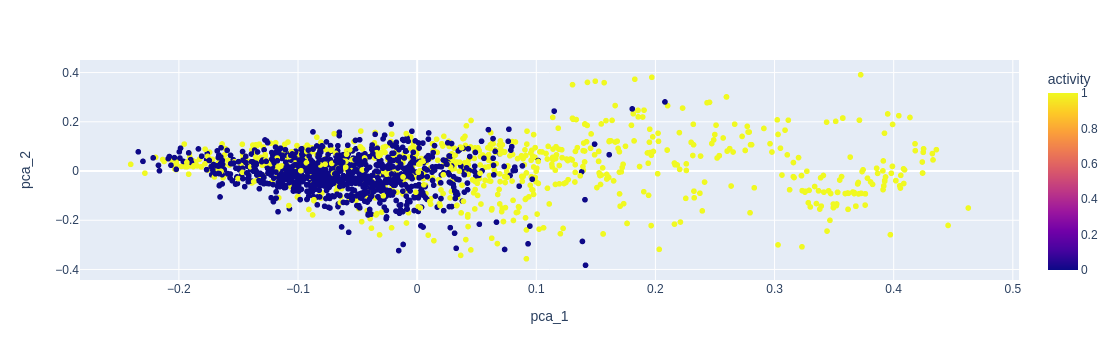

In [17]:
from sklearn.decomposition import PCA
from plotly import express as ex

pca = PCA(n_components=2)
pca_components = pca.fit_transform (df_processed.drop(['subset', 'activity'], axis=1)) # drop retira os subset e acticity do processamento

df_pca = pd.DataFrame(pca_components, columns=['pca_1', 'pca_2'])
df_pca['activity'] = df_processed['activity'] # adiciona campo activity novamente
ex.scatter(df_pca, x='pca_1', y='pca_2', color='activity')

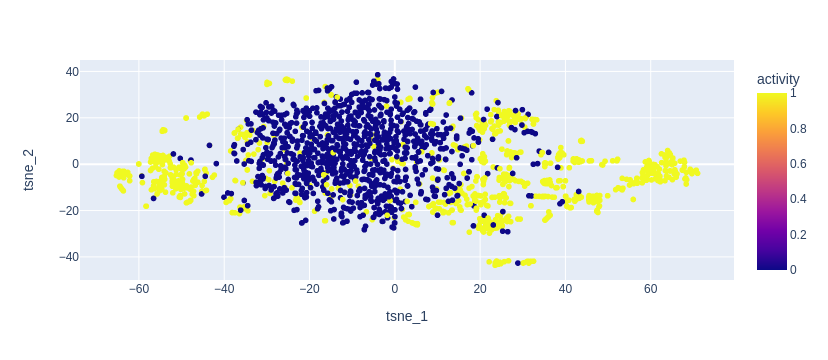

In [21]:
from sklearn.manifold import TSNE
from plotly import express as ex

tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform (df_processed.drop(['subset', 'activity'], axis=1)) 
df_tsne = pd.DataFrame(tsne_components, columns=['tsne_1', 'tsne_2'])
df_tsne['activity'] = df_processed['activity']
ex.scatter(df_tsne, x='tsne_1', y='tsne_2', color='activity')

## Supervised Learning Analysis 

In [23]:
# treinamento de aprendisado de maquina

from sklearn.linear_model import LogisticRegression

X_train = df_processed.query('subset == "train"').drop(['subset', 'activity'], axis=1)
y_train = df_processed.query('subset == "train"')['activity']

X_test = df_processed.query('subset == "test"').drop(['subset', 'activity'], axis=1)
y_test = df_processed.query('subset == "test"')['activity']


In [25]:
from sklearn.metrics import classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       194
           1       0.91      0.86      0.88       194

    accuracy                           0.89       388
   macro avg       0.89      0.89      0.89       388
weighted avg       0.89      0.89      0.89       388



In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       194
           1       0.93      0.91      0.92       194

    accuracy                           0.92       388
   macro avg       0.92      0.92      0.92       388
weighted avg       0.92      0.92      0.92       388



In [47]:
def predict_anticancer_peptide(peptide):
    aa_composition = compute_aa_composition(peptide)
    df_peptide = pd.DataFrame([aa_composition])
    return rf_model.predict_proba(df_peptide)[0][1]

predict_anticancer_peptide('ABH')

0.67